In [1]:
import os
import json
import pandas as pd
import os
import numpy as np # type: ignore
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

os.getcwd()
os.chdir(path="/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI")

In [2]:
# Libreriras para modelado y AUTOML
# ==============================================================================
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
#from pycaret.utils import check_metric
from imblearn.over_sampling import *
import os

In [3]:
# You can safely assume that `build_dataset` is correctly implemented
def build_dataset():
    data = [json.loads(x) for x in open("data/Inputs/MLA_100k_checked_v3.jsonlines")]
    target = lambda x: x.get("condition")
    N = -10000
    X_train = data[:N]
    X_test = data[N:]
    y_train = [target(x) for x in X_train]
    y_test = [target(x) for x in X_test]
    for x in X_test:
        del x["condition"]
    return X_train, y_train, X_test, y_test


if __name__ == "__main__":
    print("Loading dataset...")
    # Train and test data following sklearn naming conventions
    # X_train (X_test too) is a list of dicts with information about each item.
    # y_train (y_test too) contains the labels to be predicted (new or used).
    # The label of X_train[i] is y_train[i].
    # The label of X_test[i] is y_test[i].
    X_train, y_train, X_test, y_test = build_dataset()

Loading dataset...


In [4]:
# Convert to DataFrame
df_train = pd.DataFrame(X_train)
df_train['condition'] = y_train

df_test = pd.DataFrame(X_test)
df_test['condition'] = y_test

# Display the first few rows of the DataFrames
print("Training DataFrame head:")
print(df_train.head())

print("\nTesting DataFrame head:")
print(df_test.head())

Training DataFrame head:
                                      seller_address            warranty  \
0  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
1  {'country': {'name': 'Argentina', 'id': 'AR'},...  NUESTRA REPUTACION   
2  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
3  {'country': {'name': 'Argentina', 'id': 'AR'},...                None   
4  {'country': {'name': 'Argentina', 'id': 'AR'},...      MI REPUTACION.   

  sub_status condition deal_ids  base_price  \
0         []       new       []        80.0   
1         []      used       []      2650.0   
2         []      used       []        60.0   
3         []       new       []       580.0   
4         []      used       []        30.0   

                                            shipping  \
0  {'local_pick_up': True, 'methods': [], 'tags':...   
1  {'local_pick_up': True, 'methods': [], 'tags':...   
2  {'local_pick_up': True, 'methods': [], 'tags':...   
3  {'local_

In [5]:
df_train.head()


,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6553902747,[],MLA126406,[{'id': 'MLA4695330653-912855983'}],2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,None,NaN,None,1,1441485773000,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,[],,MLA7727150374,[],MLA10267,[{'id': 'MLA7160447179-930764806'}],2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,None,NaN,None,1,1443290910000,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6561247998,[],MLA1227,[{'id': 'MLA7367189936-916478256'}],2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,None,NaN,None,1,1441843027000,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,[],,None,[],MLA86345,[{'id': 'MLA9191625553-932309698'}],2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,None,NaN,None,1,1443466076000,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],used,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],MLA,bronze,30.0,[],buy_it_now,[dragged_bids_and_visits],,MLA3133256685,[],MLA41287,[{'id': 'MLA7787961817-902981678'}],2015-08-28T13:37:41.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7787961817,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/13595-MLA77879618...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co

In [6]:
os.getcwd()

'/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI'

In [7]:
import pandas as pd

# Read the Parquet files back into DataFrames
df = pd.read_parquet("data/Outputs/df_modelling.parquet")

# Display the first few rows of the loaded DataFrames
print("Loaded Training DataFrame head:")
print(df.shape)
(df.head())

Loaded Training DataFrame head:
(100000, 335)


,base_price,price,accepts_mercadopago,automatic_relist,subtitle,initial_quantity,sold_quantity,available_quantity,local_pick_up,free_shipping,target,mean_base_price_mode,min_base_price_mode,max_base_price_mode,var_base_price_mode,median_base_price_mode,std_base_price_mode,q1_base_price_mode,q3_base_price_mode,mean_base_price_status,min_base_price_status,max_base_price_status,var_base_price_status,median_base_price_status,std_base_price_status,q1_base_price_status,q3_base_price_status,mean_base_price_listing_type_id,min_base_price_listing_type_id,max_base_price_listing_type_id,var_base_price_listing_type_id,median_base_price_listing_type_id,std_base_price_listing_type_id,q1_base_price_listing_type_id,q3_base_price_listing_type_id,mean_base_price_state_id,min_base_price_state_id,max_base_price_state_id,var_base_price_state_id,median_base_price_state_id,std_base_price_state_id,q1_base_price_state_id,q3_base_price_state_id,mean_base_price_automatic_relist,min_base_price_automatic_relist,max_base_price_automatic_relist,var_base_price_automatic_relist,median_base_price_automatic_relist,std_base_price_automatic_relist,q1_base_price_automatic_relist,q3_base_price_automatic_relist,mean_base_price_accepts_mercadopago,min_base_price_accepts_mercadopago,max_base_price_accepts_mercadopago,var_base_price_accepts_mercadopago,median_base_price_accepts_mercadopago,std_base_price_accepts_mercadopago,q1_base_price_accepts_mercadopago,q3_base_price_accepts_mercadopago,mean_base_price_local_pick_up,min_base_price_local_pick_up,max_base_price_local_pick_up,var_base_price_local_pick_up,median_base_price_local_pick_up,std_base_price_local_pick_up,q1_base_price_local_pick_up,q3_base_price_local_pick_up,mean_base_price_free_shipping,min_base_price_free_shipping,max_base_price_free_shipping,var_base_price_free_shipping,median_base_price_free_shipping,std_base_price_free_shipping,q1_base_price_free_shipping,q3_base_price_free_shipping,mean_base_price_warranty_cleaned,min_base_price_warranty_cleaned,max_base_price_warranty_cleaned,var_base_price_warranty_cleaned,median_base_price_warranty_cleaned,std_base_price_warranty_cleaned,q1_base_price_warranty_cleaned,q3_base_price_warranty_cleaned,mean_initial_quantity_mode,min_initial_quantity_mode,max_initial_quantity_mode,var_initial_quantity_mode,median_initial_quantity_mode,std_initial_quantity_mode,q1_initial_quantity_mode,q3_initial_quantity_mode,mean_initial_quantity_status,min_initial_quantity_status,max_initial_quantity_status,var_initial_quantity_status,median_initial_quantity_status,std_initial_quantity_status,q1_initial_quantity_status,q3_initial_quantity_status,mean_initial_quantity_listing_type_id,min_initial_quantity_listing_type_id,max_initial_quantity_listing_type_id,var_initial_quantity_listing_type_id,median_initial_quantity_listing_type_id,std_initial_quantity_listing_type_id,q1_initial_quantity_listing_type_id,q3_initial_quantity_listing_type_id,mean_initial_quantity_state_id,min_initial_quantity_state_id,max_initial_quantity_state_id,var_initial_quantity_state_id,median_initial_quantity_state_id,std_initial_quantity_state_id,q1_initial_quantity_state_id,q3_initial_quantity_state_id,mean_initial_quantity_automatic_relist,min_initial_quantity_automatic_relist,max_initial_quantity_automatic_relist,var_initial_quantity_automatic_relist,median_initial_quantity_automatic_relist,std_initial_quantity_automatic_relist,q1_initial_quantity_automatic_relist,q3_initial_quantity_automatic_relist,mean_initial_quantity_accepts_mercadopago,min_initial_quantity_accepts_mercadopago,max_initial_quantity_accepts_mercadopago,var_initial_quantity_accepts_mercadopago,median_initial_quantity_accepts_mercadopago,std_initial_quantity_accepts_mercadopago,q1_initial_quantity_accepts_mercadopago,q3_initial_quantity_accepts_mercadopago,mean_initial_quantity_local_pick_up,min_initial_quantity_local_pick_up,max_initial_quantity_local_pick_up,var_initial_quantity_local_pick_up,median_initial_quantity_local_pick_up,std_initia

In [8]:
df['target'].value_counts(normalize=True)

target
1    0.53758
0    0.46242
Name: proportion, dtype: float64

In [9]:
df.dtypes

base_price                                       int64
price                                            int64
accepts_mercadopago                              int64
automatic_relist                                 int64
subtitle                                         int64
initial_quantity                                 int64
sold_quantity                                    int64
available_quantity                               int64
local_pick_up                                    int64
free_shipping                                    int64
target                                           int64
mean_base_price_mode                             int64
min_base_price_mode                              int64
max_base_price_mode                              int64
var_base_price_mode                              int64
median_base_price_mode                           int64
std_base_price_mode                              int64
q1_base_price_mode                               int64
q3_base_pr

In [10]:
# Select only the numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the covariance matrix
cova_mtrx = df_numeric.cov()

# Find the indices where covariance is zero
high_cov = np.where(cova_mtrx == 0)

# Filter out the positions where x == y (diagonal elements)
high_cov = [(cova_mtrx.index[x], cova_mtrx.columns[y]) for x, y in zip(*high_cov) if x != y]

# Display the results
print(high_cov)

[('base_price', 'subtitle'), ('base_price', 'min_initial_quantity_mode'), ('base_price', 'min_initial_quantity_status'), ('base_price', 'median_initial_quantity_status'), ('base_price', 'q1_initial_quantity_status'), ('base_price', 'min_initial_quantity_listing_type_id'), ('base_price', 'max_initial_quantity_listing_type_id'), ('base_price', 'min_initial_quantity_state_id'), ('base_price', 'max_initial_quantity_state_id'), ('base_price', 'median_initial_quantity_state_id'), ('base_price', 'q1_initial_quantity_state_id'), ('base_price', 'min_initial_quantity_automatic_relist'), ('base_price', 'max_initial_quantity_automatic_relist'), ('base_price', 'min_initial_quantity_accepts_mercadopago'), ('base_price', 'median_initial_quantity_accepts_mercadopago'), ('base_price', 'q1_initial_quantity_accepts_mercadopago'), ('base_price', 'min_initial_quantity_local_pick_up'), ('base_price', 'max_initial_quantity_local_pick_up'), ('base_price', 'median_initial_quantity_local_pick_up'), ('base_price

In [11]:
df_numeric.head()

,base_price,price,accepts_mercadopago,automatic_relist,subtitle,initial_quantity,sold_quantity,available_quantity,local_pick_up,free_shipping,target,mean_base_price_mode,min_base_price_mode,max_base_price_mode,var_base_price_mode,median_base_price_mode,std_base_price_mode,q1_base_price_mode,q3_base_price_mode,mean_base_price_status,min_base_price_status,max_base_price_status,var_base_price_status,median_base_price_status,std_base_price_status,q1_base_price_status,q3_base_price_status,mean_base_price_listing_type_id,min_base_price_listing_type_id,max_base_price_listing_type_id,var_base_price_listing_type_id,median_base_price_listing_type_id,std_base_price_listing_type_id,q1_base_price_listing_type_id,q3_base_price_listing_type_id,mean_base_price_state_id,min_base_price_state_id,max_base_price_state_id,var_base_price_state_id,median_base_price_state_id,std_base_price_state_id,q1_base_price_state_id,q3_base_price_state_id,mean_base_price_automatic_relist,min_base_price_automatic_relist,max_base_price_automatic_relist,var_base_price_automatic_relist,median_base_price_automatic_relist,std_base_price_automatic_relist,q1_base_price_automatic_relist,q3_base_price_automatic_relist,mean_base_price_accepts_mercadopago,min_base_price_accepts_mercadopago,max_base_price_accepts_mercadopago,var_base_price_accepts_mercadopago,median_base_price_accepts_mercadopago,std_base_price_accepts_mercadopago,q1_base_price_accepts_mercadopago,q3_base_price_accepts_mercadopago,mean_base_price_local_pick_up,min_base_price_local_pick_up,max_base_price_local_pick_up,var_base_price_local_pick_up,median_base_price_local_pick_up,std_base_price_local_pick_up,q1_base_price_local_pick_up,q3_base_price_local_pick_up,mean_base_price_free_shipping,min_base_price_free_shipping,max_base_price_free_shipping,var_base_price_free_shipping,median_base_price_free_shipping,std_base_price_free_shipping,q1_base_price_free_shipping,q3_base_price_free_shipping,mean_base_price_warranty_cleaned,min_base_price_warranty_cleaned,max_base_price_warranty_cleaned,var_base_price_warranty_cleaned,median_base_price_warranty_cleaned,std_base_price_warranty_cleaned,q1_base_price_warranty_cleaned,q3_base_price_warranty_cleaned,mean_initial_quantity_mode,min_initial_quantity_mode,max_initial_quantity_mode,var_initial_quantity_mode,median_initial_quantity_mode,std_initial_quantity_mode,q1_initial_quantity_mode,q3_initial_quantity_mode,mean_initial_quantity_status,min_initial_quantity_status,max_initial_quantity_status,var_initial_quantity_status,median_initial_quantity_status,std_initial_quantity_status,q1_initial_quantity_status,q3_initial_quantity_status,mean_initial_quantity_listing_type_id,min_initial_quantity_listing_type_id,max_initial_quantity_listing_type_id,var_initial_quantity_listing_type_id,median_initial_quantity_listing_type_id,std_initial_quantity_listing_type_id,q1_initial_quantity_listing_type_id,q3_initial_quantity_listing_type_id,mean_initial_quantity_state_id,min_initial_quantity_state_id,max_initial_quantity_state_id,var_initial_quantity_state_id,median_initial_quantity_state_id,std_initial_quantity_state_id,q1_initial_quantity_state_id,q3_initial_quantity_state_id,mean_initial_quantity_automatic_relist,min_initial_quantity_automatic_relist,max_initial_quantity_automatic_relist,var_initial_quantity_automatic_relist,median_initial_quantity_automatic_relist,std_initial_quantity_automatic_relist,q1_initial_quantity_automatic_relist,q3_initial_quantity_automatic_relist,mean_initial_quantity_accepts_mercadopago,min_initial_quantity_accepts_mercadopago,max_initial_quantity_accepts_mercadopago,var_initial_quantity_accepts_mercadopago,median_initial_quantity_accepts_mercadopago,std_initial_quantity_accepts_mercadopago,q1_initial_quantity_accepts_mercadopago,q3_initial_quantity_accepts_mercadopago,mean_initial_quantity_local_pick_up,min_initial_quantity_local_pick_up,max_initial_quantity_local_pick_up,var_initial_quantity_local_pick_up,median_initial_quantity_local_pick_up,std_initia

In [12]:
# Assuming data_final is your DataFrame and high_corr_var is your list of correlated variables
corr_matrix = df_numeric.corr().abs()
high_corr_var = np.where(corr_matrix > 0.8)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
high_corr_var

[('base_price', 'price'),
 ('base_price', 'price_square'),
 ('base_price', 'price_bin'),
 ('base_price', 'price_arcsin'),
 ('base_price', 'price_x_initial_quantity'),
 ('price', 'price_square'),
 ('price', 'price_sqrt'),
 ('price', 'price_bin'),
 ('price', 'price_arcsin'),
 ('price', 'price_x_initial_quantity'),
 ('accepts_mercadopago', 'mean_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'min_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'max_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'var_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'median_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'std_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'q1_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'q3_base_price_accepts_mercadopago'),
 ('accepts_mercadopago', 'mean_initial_quantity_accepts_mercadopago'),
 ('accepts_mercadopago', 'max_initial_quantity_accepts_mercadopago'),
 ('accepts_mercadopago', 'var_i

In [13]:
# Create a set to store columns to be removed
columns_to_remove = set()

for pair in high_corr_var:
    var_1 = df_numeric[pair[0]].var()
    var_2 = df_numeric[pair[1]].var()

    if not pd.isna(var_1) and not pd.isna(var_2):
        diff_var = var_1 - var_2
        if diff_var > 1e-10:  # Adjust the threshold based on your data
            print('Queda', pair[0], 'varianza:', f'{var_1:.1f}', '| Elimina:', pair[1], 'varianza:', f'{var_2:.1f}')
            columns_to_remove.add(pair[1])
        elif diff_var < -1e-10:  # Adjust the threshold based on your data
            print('Queda', pair[1], 'varianza:', f'{var_2:.1f}', '| Elimina:', pair[0], 'varianza:', f'{var_1:.1f}')
            columns_to_remove.add(pair[0])

# Remove the columns outside the loop
df_numeric.drop(columns=columns_to_remove, inplace=True)

print(df_numeric.shape)

Queda price varianza: 74358322068651.4 | Elimina: base_price varianza: 49385311861387.5
Queda price_square varianza: 274349539869425398250806599221248.0 | Elimina: base_price varianza: 49385311861387.5
Queda base_price varianza: 49385311861387.5 | Elimina: price_bin varianza: 0.0
Queda base_price varianza: 49385311861387.5 | Elimina: price_arcsin varianza: 0.0
Queda price_x_initial_quantity varianza: 19781422898165788.0 | Elimina: base_price varianza: 49385311861387.5
Queda price_square varianza: 274349539869425398250806599221248.0 | Elimina: price varianza: 74358322068651.4
Queda price varianza: 74358322068651.4 | Elimina: price_sqrt varianza: 51465.6
Queda price varianza: 74358322068651.4 | Elimina: price_bin varianza: 0.0
Queda price varianza: 74358322068651.4 | Elimina: price_arcsin varianza: 0.0
Queda price_x_initial_quantity varianza: 19781422898165788.0 | Elimina: price varianza: 74358322068651.4
Queda mean_base_price_accepts_mercadopago varianza: 501794686.6 | Elimina: accepts_

In [14]:
dataset_00 = pd.concat([df.select_dtypes(exclude=[np.number]), df_numeric], axis=1)

In [15]:
# Remove duplicates from the DataFrame based on the 'id_peticion' column
#dataset_01 = dataset_00.drop_duplicates(subset=['id'])

In [16]:
dataset_00.shape

(100000, 130)

In [17]:
dataset_00.head(2)


,subtitle,target,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,var_base_price_free_shipping,var_base_price_warranty_cleaned,q3_base_price_warranty_cleaned,min_initial_quantity_mode,max_initial_quantity_mode,min_initial_quantity_status,max_initial_quantity_status,median_initial_quantity_status,q1_initial_quantity_status,min_initial_quantity_listing_type_id,max_initial_quantity_listing_type_id,var_initial_quantity_listing_type_id,min_initial_quantity_state_id,max_initial_quantity_state_id,var_initial_quantity_state_id,median_initial_quantity_state_id,q1_initial_quantity_state_id,min_initial_quantity_automatic_relist,max_initial_quantity_automatic_relist,min_initial_quantity_accepts_mercadopago,median_initial_quantity_accepts_mercadopago,q1_initial_quantity_accepts_mercadopago,min_initial_quantity_local_pick_up,max_initial_quantity_local_pick_up,median_initial_quantity_local_pick_up,q1_initial_quantity_local_pick_up,min_initial_quantity_free_shipping,max_initial_quantity_free_shipping,q1_initial_quantity_free_shipping,min_initial_quantity_warranty_cleaned,max_initial_quantity_warranty_cleaned,var_initial_quantity_warranty_cleaned,q1_initial_quantity_warranty_cleaned,min_sold_quantity_mode,median_sold_quantity_mode,q1_sold_quantity_mode,min_sold_quantity_status,median_sold_quantity_status,q1_sold_quantity_status,q3_sold_quantity_status,min_sold_quantity_listing_type_id,max_sold_quantity_listing_type_id,var_sold_quantity_listing_type_id,q1_sold_quantity_listing_type_id,min_sold_quantity_state_id,median_sold_quantity_state_id,q1_sold_quantity_state_id,q3_sold_quantity_state_id,min_sold_quantity_automatic_relist,median_sold_quantity_automatic_relist,q1_sold_quantity_automatic_relist,min_sold_quantity_accepts_mercadopago,median_sold_quantity_accepts_mercadopago,q1_sold_quantity_accepts_mercadopago,q3_sold_quantity_accepts_mercadopago,min_sold_quantity_local_pick_up,median_sold_quantity_local_pick_up,q1_sold_quantity_local_pick_up,q3_sold_quantity_local_pick_up,min_sold_quantity_free_shipping,median_sold_quantity_free_shipping,q1_sold_quantity_free_shipping,min_sold_quantity_warranty_cleaned,max_sold_quantity_warranty_cleaned,var_sold_quantity_warranty_cleaned,median_sold_quantity_warranty_cleaned,q1_sold_quantity_warranty_cleaned,category_id_MLA1227,category_id_Rare,currency_id_ARS,currency_id_USD,video_id_QQNfOicE_o8,video_id_Rare,country_name_,country_name_Argentina,country_id_,country_id_AR,state_name_Rare,state_id_Rare,city_id_,city_id_TUxBQlBBTDI1MTVa,mode_custom,descrip_mdo_0_Efectivo,descrip_mdo_0_Rare,descrip_mdo_0_Transferencia bancaria,id_mdo_0_MLAMO,id_mdo_0_MLATB,id_mdo_0_Rare,season_name_,season_name_All-Season,season_name_Hombre,season_name_Mujer,season_name_Niñas,season_name_Niños,season_name_Rare,gender_name_,gender_name_All-Season,gender_name_Autumn-Winter,gender_name_Spring-Summer,warranty_cleaned_otros,warranty_cleaned_si,first_two_words_title_Rare,first_word_title_Rare,title_2_Rare,title_2_otros,date_created_month_201508,date_created_month_201509,date_created_month_201510,date_created_month_Rare,price_square,price_cube,price_fourth,price_log,initial_quantity_fourth,initial_quantity_log,initial_quantity_arcsin,sold_quantity_fourth,sold_quantity_sqrt,sold_quantity_yeojohnson,price_x_sold_quantity,price_2_x_sold_quantity
0,0,1,109329072070789,2879725527,78174286476326,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,890,1,9999,1,9999,1,1,1,9999,139594,1,9999,231224,1,1,1,9999,1,1,1,1,9999,1,1,1,9999,1,1,9999,43605,1,0,0,0,0,0,0,0,0,418,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8676,1839,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,6400,512000,40960000,4.382027,1,0.0,1.570796,0,0.0,-0.450705,0,0
1,0,0,9144042,2879725527,21082242084,2192546357,51819250992331,50503409723708,62068994884541,509210860460

In [18]:
data = dataset_00.sample(frac=0.70, random_state=2024)
data_validacion = dataset_00.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_validacion.reset_index(inplace=True, drop=True)
print(data.shape)
print(data_validacion.shape)

(70000, 130)
(30000, 130)


In [19]:
col_categoricas = data.select_dtypes('object').columns
col_categoricas

Index([], dtype='object')

In [20]:
col_numericas = data.columns.drop(col_categoricas)
col_numericas

Index(['subtitle', 'target', 'var_base_price_mode', 'var_base_price_status',
       'var_base_price_listing_type_id', 'var_base_price_state_id',
       'var_base_price_automatic_relist', 'var_base_price_accepts_mercadopago',
       'var_base_price_local_pick_up', 'var_base_price_free_shipping',
       ...
       'price_fourth', 'price_log', 'initial_quantity_fourth',
       'initial_quantity_log', 'initial_quantity_arcsin',
       'sold_quantity_fourth', 'sold_quantity_sqrt',
       'sold_quantity_yeojohnson', 'price_x_sold_quantity',
       'price_2_x_sold_quantity'],
      dtype='object', length=130)

In [21]:
data.head()

,subtitle,target,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,var_base_price_free_shipping,var_base_price_warranty_cleaned,q3_base_price_warranty_cleaned,min_initial_quantity_mode,max_initial_quantity_mode,min_initial_quantity_status,max_initial_quantity_status,median_initial_quantity_status,q1_initial_quantity_status,min_initial_quantity_listing_type_id,max_initial_quantity_listing_type_id,var_initial_quantity_listing_type_id,min_initial_quantity_state_id,max_initial_quantity_state_id,var_initial_quantity_state_id,median_initial_quantity_state_id,q1_initial_quantity_state_id,min_initial_quantity_automatic_relist,max_initial_quantity_automatic_relist,min_initial_quantity_accepts_mercadopago,median_initial_quantity_accepts_mercadopago,q1_initial_quantity_accepts_mercadopago,min_initial_quantity_local_pick_up,max_initial_quantity_local_pick_up,median_initial_quantity_local_pick_up,q1_initial_quantity_local_pick_up,min_initial_quantity_free_shipping,max_initial_quantity_free_shipping,q1_initial_quantity_free_shipping,min_initial_quantity_warranty_cleaned,max_initial_quantity_warranty_cleaned,var_initial_quantity_warranty_cleaned,q1_initial_quantity_warranty_cleaned,min_sold_quantity_mode,median_sold_quantity_mode,q1_sold_quantity_mode,min_sold_quantity_status,median_sold_quantity_status,q1_sold_quantity_status,q3_sold_quantity_status,min_sold_quantity_listing_type_id,max_sold_quantity_listing_type_id,var_sold_quantity_listing_type_id,q1_sold_quantity_listing_type_id,min_sold_quantity_state_id,median_sold_quantity_state_id,q1_sold_quantity_state_id,q3_sold_quantity_state_id,min_sold_quantity_automatic_relist,median_sold_quantity_automatic_relist,q1_sold_quantity_automatic_relist,min_sold_quantity_accepts_mercadopago,median_sold_quantity_accepts_mercadopago,q1_sold_quantity_accepts_mercadopago,q3_sold_quantity_accepts_mercadopago,min_sold_quantity_local_pick_up,median_sold_quantity_local_pick_up,q1_sold_quantity_local_pick_up,q3_sold_quantity_local_pick_up,min_sold_quantity_free_shipping,median_sold_quantity_free_shipping,q1_sold_quantity_free_shipping,min_sold_quantity_warranty_cleaned,max_sold_quantity_warranty_cleaned,var_sold_quantity_warranty_cleaned,median_sold_quantity_warranty_cleaned,q1_sold_quantity_warranty_cleaned,category_id_MLA1227,category_id_Rare,currency_id_ARS,currency_id_USD,video_id_QQNfOicE_o8,video_id_Rare,country_name_,country_name_Argentina,country_id_,country_id_AR,state_name_Rare,state_id_Rare,city_id_,city_id_TUxBQlBBTDI1MTVa,mode_custom,descrip_mdo_0_Efectivo,descrip_mdo_0_Rare,descrip_mdo_0_Transferencia bancaria,id_mdo_0_MLAMO,id_mdo_0_MLATB,id_mdo_0_Rare,season_name_,season_name_All-Season,season_name_Hombre,season_name_Mujer,season_name_Niñas,season_name_Niños,season_name_Rare,gender_name_,gender_name_All-Season,gender_name_Autumn-Winter,gender_name_Spring-Summer,warranty_cleaned_otros,warranty_cleaned_si,first_two_words_title_Rare,first_word_title_Rare,title_2_Rare,title_2_otros,date_created_month_201508,date_created_month_201509,date_created_month_201510,date_created_month_Rare,price_square,price_cube,price_fourth,price_log,initial_quantity_fourth,initial_quantity_log,initial_quantity_arcsin,sold_quantity_fourth,sold_quantity_sqrt,sold_quantity_yeojohnson,price_x_sold_quantity,price_2_x_sold_quantity
0,0,1,9144042,2879725527,78174286476326,3697784196,51819250992331,50503409723708,62068994884541,50921086046018,5409689,389,1,9999,1,9999,1,1,1,9999,139594,1,9999,60752,1,1,1,9999,1,1,1,1,9999,1,1,1,9999,1,1,9999,558384,1,0,0,0,0,0,0,0,0,418,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1367,518,0,0,0,1,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,16641,2146689,276922881,4.859812,1,0.000000,1.570796,0,0.0,-0.450705,0,0
1,0,1,109329072070789,2879725527,78174286476326,2192546357,51819250992331,50503409723708,62068994884541,50921

In [22]:
s = ClassificationExperiment()

model_setup = s.setup(
    data=data,
    target='target', 
    session_id=765,
    normalize=True,
    #log_experiment=False,
    #imputation_type='iterative',
    normalize_method='robust',
    fix_imbalance=False,
    remove_outliers=False,
   # ignore_features=['category_id','date_created','stop_time','start_time',
   # 'state_name','seller_id','first_two_words_title'],
     feature_selection=True, 
  #  ignore_low_variance=True,
#    feature_ratio=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.7,
    fold_strategy='stratifiedkfold', fold_shuffle=True
   # numeric_features=col_numericas
    #pca=True
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26361, number of negative: 22639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2404
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537980 -> initscore=0.152212
[LightGBM] [Info] Start training from score 0.152212


,Description,Value
0,Session id,765
1,Target,target
2,Target type,Binary
3,Original data shape,"(70000, 130)"
4,Transformed data shape,"(70000, 26)"
5,Transformed train set shape,"(49000, 26)"
6,Transformed test set shape,"(21000, 26)"
7,Numeric features,129
8,Rows with missing values,29.6%
9,Preprocess,True


In [23]:
# OOP API
best = s.compare_models(sort='Accuracy', include = ['rf','lightgbm','et','dt','gbc','knn','ada','lr'])
#best = s.compare_models(sort='Accuracy', include = ['lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8482,0.9299,0.8333,0.8784,0.8552,0.6959,0.6971,1.2230
gbc,Gradient Boosting Classifier,0.8382,0.9232,0.8377,0.8582,0.8478,0.6751,0.6754,1.7690
rf,Random Forest Classifier,0.8357,0.9158,0.8343,0.8567,0.8453,0.6703,0.6706,1.5840
ada,Ada Boost Classifier,0.8274,0.9156,0.8533,0.8306,0.8417,0.6520,0.6525,1.0880
et,Extra Trees Classifier,0.8111,0.8665,0.8007,0.8408,0.8202,0.6215,0.6225,1.2520
dt,Decision Tree Classifier,0.8093,0.8189,0.7950,0.8418,0.8177,0.6181,0.6193,0.8800
knn,K Neighbors Classifier,0.7702,0.8198,0.7052,0.8423,0.7673,0.5439,0.5526,1.1230
lr,Logistic Regression,0.6333,0.6923,0.6662,0.6590,0.6582,0.2618,0.2659,0.9160


In [24]:
m1_tuneado = s.tune_model(best, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8378,0.9221,0.8266,0.8657,0.8457,0.6748,0.6756
1,0.8524,0.9324,0.8456,0.8758,0.8605,0.7040,0.7045
2,0.8567,0.9317,0.8418,0.8862,0.8634,0.7130,0.7140
3,0.8616,0.9370,0.8547,0.8842,0.8692,0.7224,0.7229
4,0.8529,0.9310,0.8410,0.8801,0.8601,0.7051,0.7059
5,0.8520,0.9323,0.8524,0.8699,0.8611,0.7029,0.7030
6,0.8571,0.9328,0.8509,0.8796,0.8650,0.7134,0.7138
7,0.8498,0.9286,0.8418,0.8743,0.8578,0.6988,0.6993
8,0.8478,0.9299,0.8403,0.8720,0.8559,0.6947,0.6952


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=765, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [26]:
print(m1_tuneado)

LGBMClassifier(bagging_fraction=0.4, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=270, n_jobs=-1, num_leaves=200, objective=None,
               random_state=765, reg_alpha=2, reg_lambda=0.5, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [27]:
# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

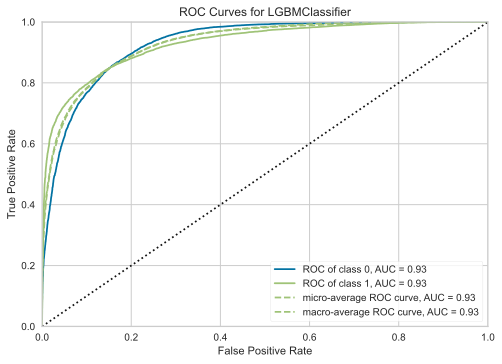

In [29]:
s.plot_model(best, plot='auc')

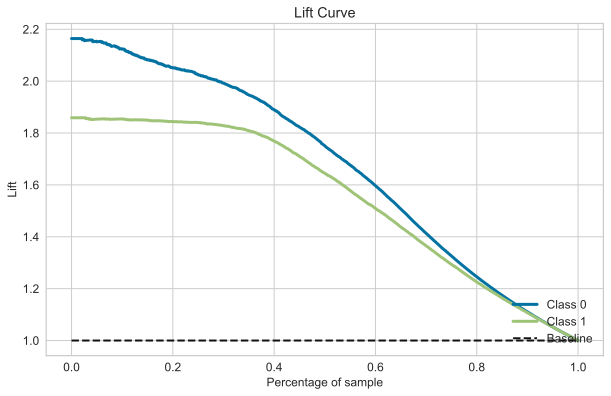

In [30]:
s.plot_model(best, plot="lift")

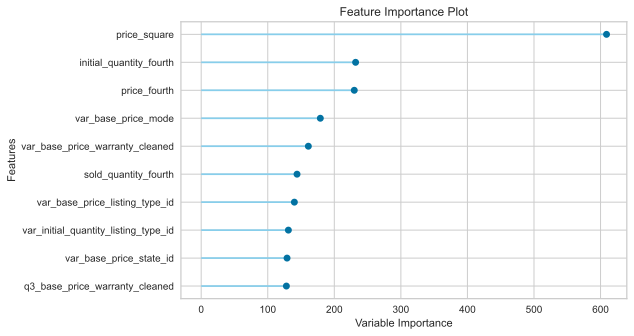

In [31]:
s.plot_model(best, plot="feature")

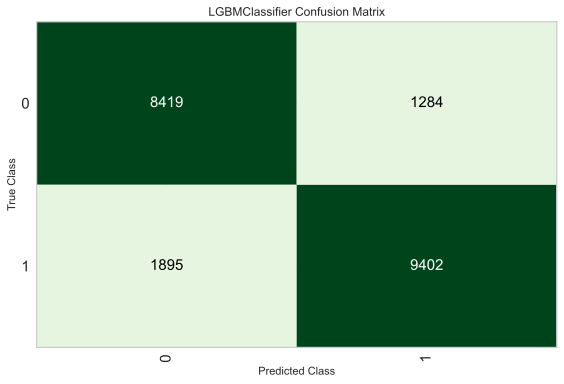

In [32]:
s.plot_model(best, plot="confusion_matrix")

In [33]:

# OOP API
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8486,0.9301,0.8323,0.8798,0.8554,0.6968,0.6980


,subtitle,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,var_base_price_free_shipping,var_base_price_warranty_cleaned,...,initial_quantity_log,initial_quantity_arcsin,sold_quantity_fourth,sold_quantity_sqrt,sold_quantity_yeojohnson,price_x_sold_quantity,price_2_x_sold_quantity,target,prediction_label,prediction_score
33118,0,9144042,2879725527,78174286476326,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,82512652,...,0.000000,1.570796,1,1.0,2.061100,100,10000,1,1,0.9276
2138,0,109329072070789,2879725527,1824627272,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,0.000000,1.570796,0,0.0,-0.450705,0,0,0,0,0.9102
57681,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,218644896,...,2.302585,NaN,0,0.0,-0.450705,0,0,1,1,0.9939
67881,0,9144042,2879725527,78174286476326,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,5409689,...,0.000000,1.570796,0,0.0,-0.450705,0,0,0,0,0.8979
37191,0,109329072070789,2879725527,78174286476326,2192546357,51819250992331,50503409723708,13272280236,50921086046018,905938213541580,...,0.000000,1.570796,0,0.0,-0.450705,0,0,0,0,0.8337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,0,9144042,2879725527,78174286476326,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,5409689,...,0.000000,1.570796,0,0.0,-0.450705,0,0,0,0,0.8950
17619,0,9144042,2879725527,21082242084,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,82512652,...,0.693147,NaN,1,1.0,2.061100,680,462400,1,1,0.9750
44286,0,109329072070789,2879725527,1824627272,2192546357,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,0.000000,1.570796,0,0.0,-0.450705,0,0,0,0,0.9122
66995,0,109329072070789,2879725527,1824627272,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,0.000000,1.570796,0,0.0,-0.450705,0,0,0,0,0.9222


In [34]:
# OOP API
predictions = s.predict_model(best, data=data_validacion)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8508,0.9319,0.8336,0.8820,0.8571,0.7013,0.7026


,subtitle,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,var_base_price_free_shipping,var_base_price_warranty_cleaned,...,initial_quantity_log,initial_quantity_arcsin,sold_quantity_fourth,sold_quantity_sqrt,sold_quantity_yeojohnson,price_x_sold_quantity,price_2_x_sold_quantity,target,prediction_label,prediction_score
0,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,5409689,...,0.00000,1.570796,0,0.0,-0.450705,0,0,1,1,0.6701
1,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,4.60517,NaN,1,1.0,2.061100,50,2500,1,1,0.9677
2,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,0.00000,1.570796,0,0.0,-0.450705,0,0,1,0,0.5440
3,0,9144042,2879725527,78174286476326,3697784196,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,0.00000,1.570796,0,0.0,-0.450705,0,0,1,1,0.6016
4,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,82512652,...,0.00000,1.570796,0,0.0,-0.450705,0,0,0,0,0.6864


In [35]:
a = s.predict_model(best, data=data_validacion, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8508,0.9319,0.8336,0.8820,0.8571,0.7013,0.7026


In [36]:
a.head()

,subtitle,var_base_price_mode,var_base_price_status,var_base_price_listing_type_id,var_base_price_state_id,var_base_price_automatic_relist,var_base_price_accepts_mercadopago,var_base_price_local_pick_up,var_base_price_free_shipping,var_base_price_warranty_cleaned,...,initial_quantity_arcsin,sold_quantity_fourth,sold_quantity_sqrt,sold_quantity_yeojohnson,price_x_sold_quantity,price_2_x_sold_quantity,target,prediction_label,prediction_score_0,prediction_score_1
0,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,5409689,...,1.570796,0,0.0,-0.450705,0,0,1,1,0.3299,0.6701
1,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,NaN,1,1.0,2.061100,50,2500,1,1,0.0323,0.9677
2,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,1.570796,0,0.0,-0.450705,0,0,1,0,0.5440,0.4560
3,0,9144042,2879725527,78174286476326,3697784196,51819250992331,50503409723708,62068994884541,50921086046018,4583176184,...,1.570796,0,0.0,-0.450705,0,0,1,1,0.3984,0.6016
4,0,109329072070789,2879725527,78174286476326,141043796917680,51819250992331,50503409723708,62068994884541,50921086046018,82512652,...,1.570796,0,0.0,-0.450705,0,0,0,0,0.6864,0.3136


In [37]:
a[['target','prediction_score_1']].groupby(a.prediction_label)['prediction_score_1'].agg(['count','min','max'])

,count,min,max
prediction_label,,,
0,14783,0.0006,0.5000
1,15217,0.5002,0.9996


In [38]:
a.shape

(30000, 133)

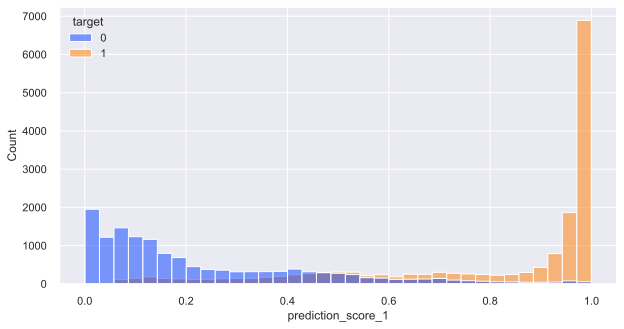

In [39]:

#################### Histograma Prob
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=a, x="prediction_score_1", hue="target", palette='bright', bins=35)
#plt.xlim(0, 0.4)
#plt.ylim(0, 50)
plt.show()

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.993,1.000,0.996,3000.0,2997.0,3.0,1610.0,3000,99.900,3000.0,2997.0,3000,3.0,10.0,18.615,18.634,0.022,18.593,1.862
1,2,0.978,0.993,0.987,3000.0,2974.0,26.0,1610.0,3000,99.133,6000.0,5971.0,6000,29.0,20.0,37.087,37.267,0.209,36.878,1.854
2,3,0.940,0.978,0.963,3000.0,2895.0,105.0,1610.0,3000,96.500,9000.0,8866.0,9000,134.0,30.0,55.068,55.901,0.964,54.104,1.836
3,4,0.724,0.940,0.848,3000.0,2560.0,440.0,1610.0,3000,85.333,12000.0,11426.0,12000,574.0,40.0,70.969,74.534,4.129,66.840,1.774
4,5,0.511,0.724,0.612,3000.0,1872.0,1128.0,1610.0,3000,62.400,15000.0,13298.0,15000,1702.0,50.0,82.596,93.168,12.245,70.351,1.652
5,6,0.361,0.511,0.436,3000.0,1317.0,1683.0,1610.0,1100,43.900,18000.0,14615.0,16100,3385.0,60.0,90.776,100.000,24.353,66.423,1.513
6,7,0.190,0.361,0.269,3000.0,771.0,2229.0,1610.0,0,25.700,21000.0,15386.0,16100,5614.0,70.0,95.565,100.000,40.388,55.177,1.365
7,8,0.111,0.190,0.145,3000.0,421.0,2579.0,1610.0,0,14.033,24000.0,15807.0,16100,8193.0,80.0,98.180,100.000,58.942,39.238,1.227
8,9,0.053,0.111,0.081,3000.0,241.0,2759.0,1610.0,0,8.033,27000.0,16048.0,16100,10952.0,90.0,99.677,100.000,78.791,20.886,1.108
9,10,0.001,0.053,0.024,3000.0,52.0,2948.0,1610.0,0,1.733,30000.0,16100.0,16100,13900.0,100.0,100.000,100.000,100.000,0.000,1.000


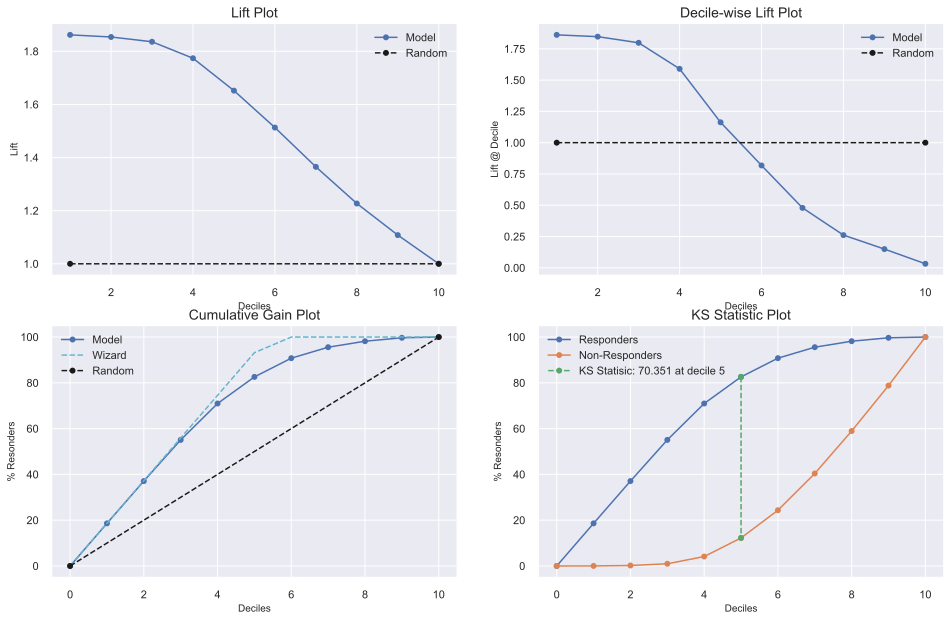

In [40]:
import kds # LIFT PLOT
report_lift = kds.metrics.report(a['target'], a['prediction_score_1'])
report_lift